In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Information Provided to us:**

    About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

    Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
    For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


**Dataset**

*The company collected the data on individuals who purchased a treadmill from the **AeroFit stores during the prior three months.** The dataset has the following features:*

Product Purchased: *	KP281, KP481, or KP781*

Age: 	*In years*

Gender: 	*Male/Female*

Education: 	*In years*

MaritalStatus: *	Single or partnered*

Usage: 	The average number of times the customer plans to use the treadmill each week.

Income: 	Annual income (in $)

Fitness: 	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles: 	The average number of miles the customer expects to walk/run each week

Product Portfolio:

    The KP281 is an entry-level treadmill that sells for $1,500.
    The KP481 is for mid-level runners that sell for $1,750.
    The KP781 treadmill is having advanced features that sell for $2,500.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df['Age'].min(), df['Age'].max()

(18, 50)

In [ ]:
df['Usage'].min(), df['Usage'].max()

(2, 7)

In [ ]:
df['Fitness'].min(), df['Fitness'].max()

(1, 5)

In [ ]:
df['Miles'].min(), df['Miles'].max()

(21, 360)

**Data Check:**

  -- Their are no null values in Dataset.

  -- Their are three type of product/Treadmill.

  -- Avg. weekly usage ranges from 2 to 7 times.

  -- Fitness range is from 1 to 5; 1 being 'poor' & 5 being 'Fittest'.

  -- Miles has wide range of data from just 21 Miles to 360 Miles.

**Preliminary Assessment of data:**

 -- How many people rate themsleves prefectly fit and poor health ?

 -- Avg. Miles & Usage customers expected to cover during week ?

 -- Number of treadmills sold to how many customers ?

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
s = df.groupby(['Gender','Fitness'])['Fitness'].count()

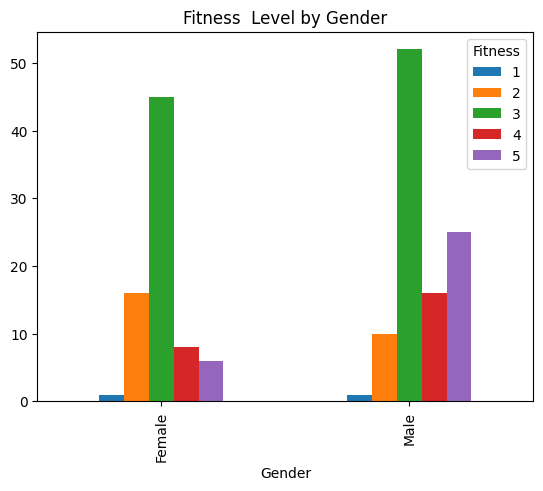

In [ ]:
s.unstack().plot.bar(title = 'Fitness  Level by Gender')
plt.show()

-- Female Customer's rate them 2 & 3 being majority on fitness metric.

-- Male customer's rate them 3 & 5 majorly on fitness metric.

This shows that generally men rate themselves higher than their counterpart.

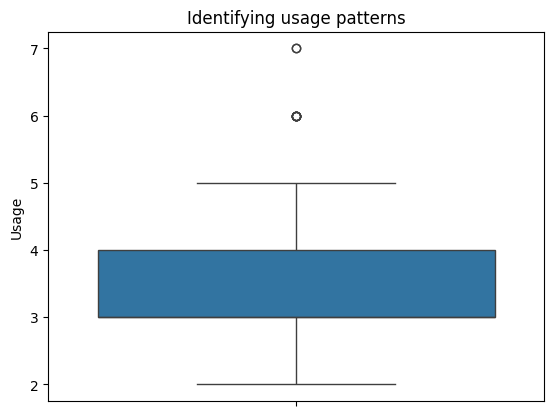

In [ ]:
sns.boxplot(data=df['Usage'])
plt.title('Identifying usage patterns')
plt.show()

-- Majority of Customer's use treadmill **about 3-4 times a week**. With 6 & 7 being the outliers.

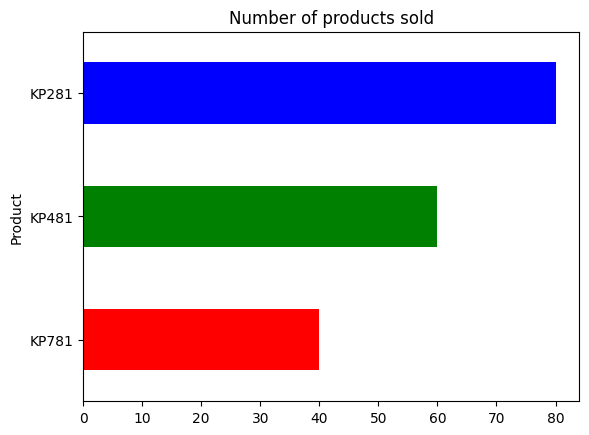

In [ ]:
df.groupby(['Product'])['Product'].count()[::-1].plot.barh(x='Product',color=['red','green','blue'])
plt.title('Number of products sold')
plt.show()

-- *KP281* dominates the sale, being **highest twice the amount of flagship product** *KP781*.

-- *KP281* also is the entry level product in the catalouge starting at **1500$**.

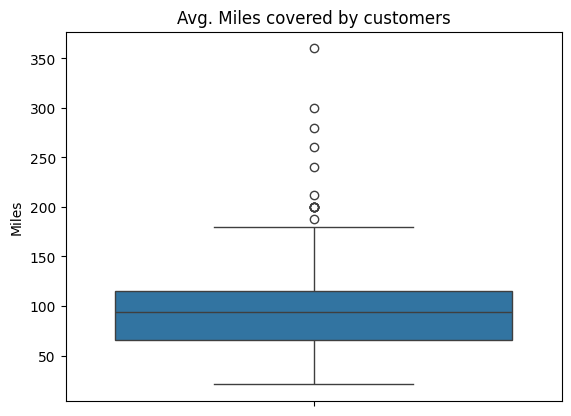

In [ ]:
sns.boxplot(data=df['Miles'])
plt.title('Avg. Miles covered by customers')
plt.show()

So alot of customer's cover about 50 - 110 Miles in a week. Their are some outlier's which goes to about 350 Miles.

In [ ]:
dt = df.copy()

In [ ]:
# Dataframe divided into mulitple products
# D1 is for KP281
d1 = dt[dt['Product'] == 'KP281']
d1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# D2 is for KP481
d2 = dt[dt['Product'] == 'KP481']
d2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212


In [ ]:
# D3 is for KP781
d3 = dt[dt['Product'] == 'KP781']
d3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100


In [ ]:
# Filtering data by removing outliers from it

d1 = d1[d1['Miles'] < 120]

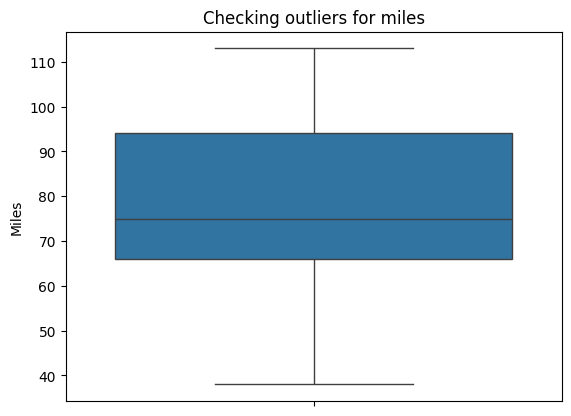

In [ ]:
sns.boxplot(data=d1['Miles'])
plt.title('Checking outliers for miles')
plt.show()

In [ ]:
c1 = {
    'Product Name' : d1['Product'].unique()[0],
    'Avg. Age' : round(d1['Age'].mean(),2),
    'Avg. Education' : d1['Education'].mode(),
    'Marital Status' : d1['MaritalStatus'].mode()[0],
    'Avg. Usage' : round(d1['Usage'].mean(),0),
    'Fitness' : d1['Fitness'].mode()[0],
    'Avg. Income' : round(d1['Income'].mean(),2),
    'Avg. Miles' : round(d1['Miles'].mean(),2)
}

In [ ]:
c1

{'Product Name': 'KP281',
 'Avg. Age': 28.51,
 'Avg. Education': 0    16
 Name: Education, dtype: int64,
 'Marital Status': 'Partnered',
 'Avg. Usage': 3.0,
 'Fitness': 3,
 'Avg. Income': 46386.53,
 'Avg. Miles': 77.3}

In [ ]:
q1 = pd.DataFrame(c1, index=[0])

In [ ]:
q1=q1.unstack().reset_index()
q1 = q1.drop('level_1',axis=1)
q1.rename(columns = {'level_0' : 'Index',0:'Values'},inplace = True)

In [ ]:
d1['Gender'].mode()

0    Female
Name: Gender, dtype: object

In [ ]:
# So we will filter the data and removing the outliers.
d2 = d2[d2['Miles'] < 150]
d2 = d2[d2['Age'] < 45]


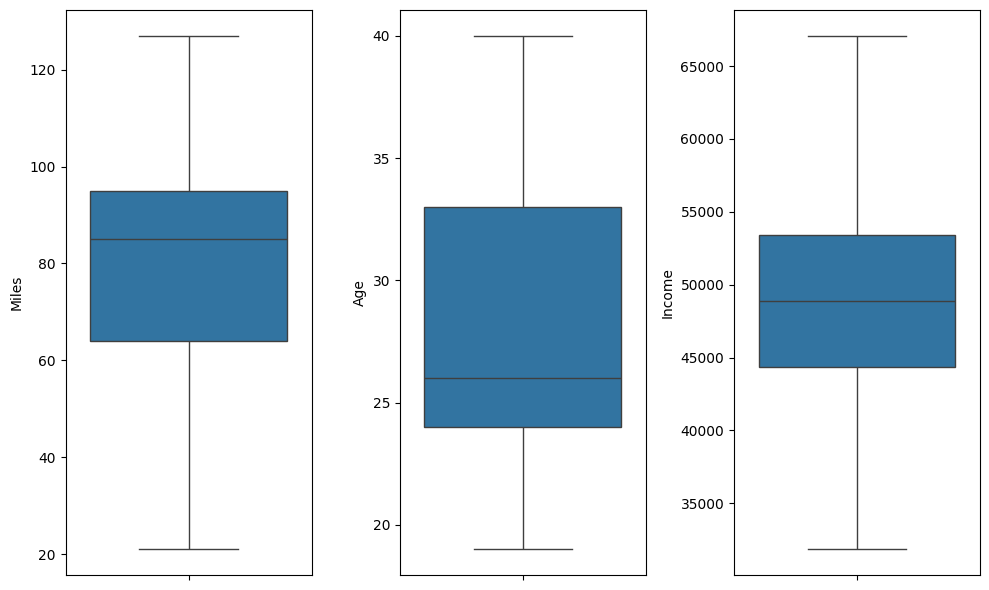

In [ ]:
# Repeat same for KP481 & KP781
# First check for the outliers in D2 data for KP481
fig = plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(data = d2['Miles'])
plt.subplot(1,3,2)
sns.boxplot(data = d2['Age'])
plt.subplot(1,3,3)
sns.boxplot(data = d2['Income'])
plt.tight_layout()
plt.show()

In [ ]:
c2 = {
    'Product Name' : d2['Product'].unique()[0],
    'Avg. Age' : round(d2['Age'].mean(),2),
    'Avg. Education' : d2['Education'].mode(),
    'Marital Status' : d2['MaritalStatus'].mode()[0],
    'Avg. Usage' : round(d2['Usage'].mean(),0),
    'Fitness' : d2['Fitness'].mode()[0],
    'Avg. Income' : round(d2['Income'].mean(),2),
    'Avg. Miles' : round(d2['Miles'].mean(),2)
}

In [ ]:
q2 = pd.DataFrame(c2,index = [0])
q2= q2.unstack().reset_index()
q2 = q2.drop('level_1',axis=1)
q2.rename(columns = {'level_0' : 'Index',0:'Values'},inplace = True)

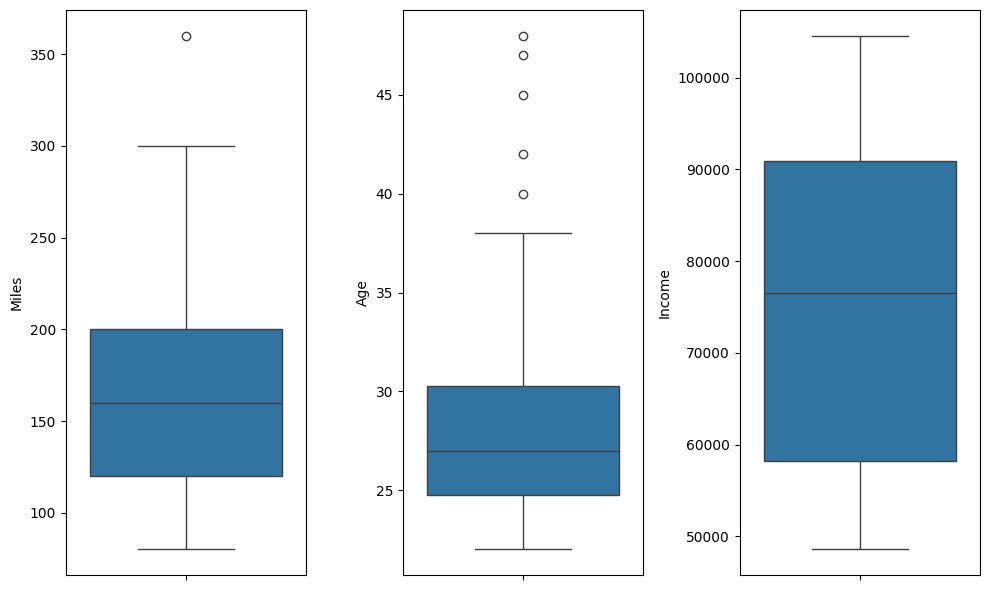

In [ ]:
Ufig = plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(data = d3['Miles'])
plt.subplot(1,3,2)
sns.boxplot(data = d3['Age'])
plt.subplot(1,3,3)
sns.boxplot(data = d3['Income'])
plt.tight_layout()
plt.show()

In [ ]:
d3 = d3[d3['Miles'] < 300]
d3 = d3[d3['Age'] < 39]

In [ ]:
c3 = {
    'Product Name' : d3['Product'].unique()[0],
    'Avg. Age' : round(d3['Age'].mean(),2),
    'Avg. Education' : d3['Education'].mode()[0 ],
    'Marital Status' : d3['MaritalStatus'].mode()[0],
    'Avg. Usage' : round(d3['Usage'].mean(),0),
    'Fitness' : d3['Fitness'].mode()[0],
    'Avg. Income' : round(d3['Income'].mean(),2),
    'Avg. Miles' : round(d3['Miles'].mean(),2)
}

In [ ]:
q3 = pd.DataFrame(c3,index = [0])
q3= q3.unstack().reset_index()
q3 = q3.drop('level_1',axis=1)
q3.rename(columns = {'level_0' : 'Index',0:'Values'},inplace = True)

In [ ]:
q1

,Index,Values
0,Product Name,KP281
1,Avg. Age,28.51
2,Avg. Education,16
3,Marital Status,Partnered
4,Avg. Usage,3.0
5,Fitness,3
6,Avg. Income,46386.53
7,Avg. Miles,77.3


we have extracted Destricptive Information from the product KP281:

- Female are major buyers of Entry level product.
- On Avg. education is around 16 years
- So people who are engaged/ marries are buyer's of Product.
- They use the product on Avg. 3 times a week.

In [ ]:
q2

,Index,Values
0,Product Name,KP481
1,Avg. Age,28.4
2,Avg. Education,16
3,Marital Status,Partnered
4,Avg. Usage,3.0
5,Fitness,3
6,Avg. Income,48960.49
7,Avg. Miles,83.96


In [ ]:
q3

,Index,Values
0,Product Name,KP781
1,Avg. Age,26.61
2,Avg. Education,18
3,Marital Status,Partnered
4,Avg. Usage,5.0
5,Fitness,5
6,Avg. Income,71987.7
7,Avg. Miles,156.24


- Customer's who brought KP781 most expensive product from aerofit.
- Avg. age is a bit less than others.
- years of education is higher by about 2 years on avg.
- They also use the product more about 5 times a week, more than other customer's who bought inferior product.
- They also rate themselves higher than other customer's.
- They earn substanialy more then other customers.
- Finally they also clock more miles than anybody on Avg. 156 Miles a week almost double of customer who brought KP481.

# **UNIVARIATE ANALYSIS**

In [ ]:
combined_df = pd.concat([d1,d2,d3], ignore_index=True)


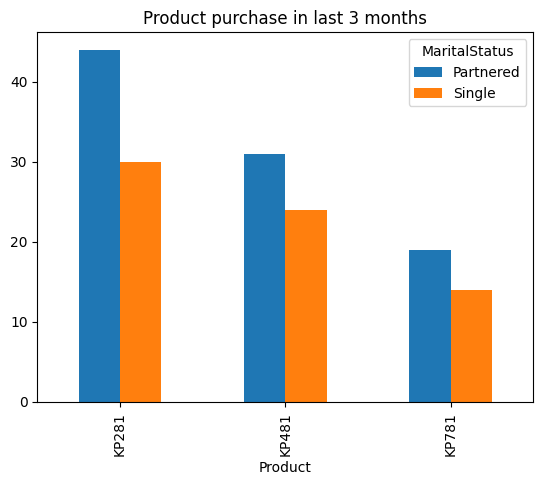

In [ ]:
combined_df.groupby(['Product','MaritalStatus'])['MaritalStatus'].count().unstack().plot.bar()
plt.title('Product purchase in last 3 months')
plt.show()

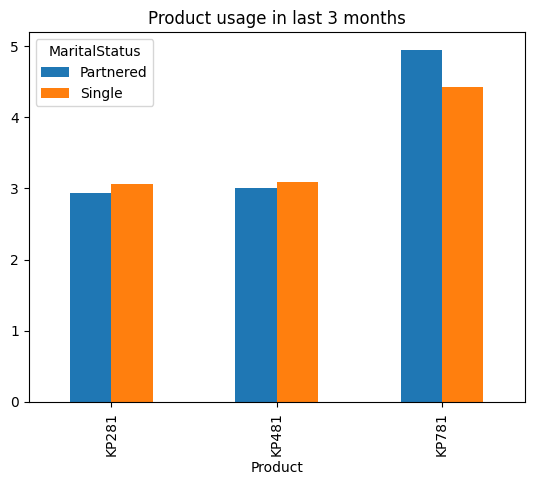

In [ ]:
combined_df.groupby(['Product','MaritalStatus'])['Usage'].mean().unstack().plot.bar()
plt.title('Product usage in last 3 months')
plt.show()

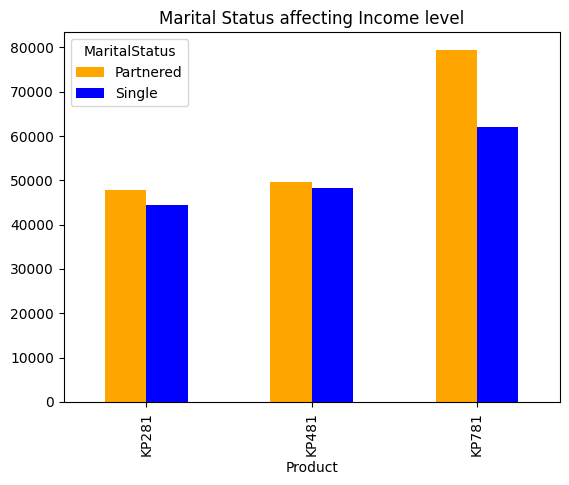

In [ ]:
combined_df.groupby(['Product','MaritalStatus'])['Income'].mean().unstack().plot.bar(color=['orange','blue'])
plt.title('Marital Status affecting Income level')
plt.show()

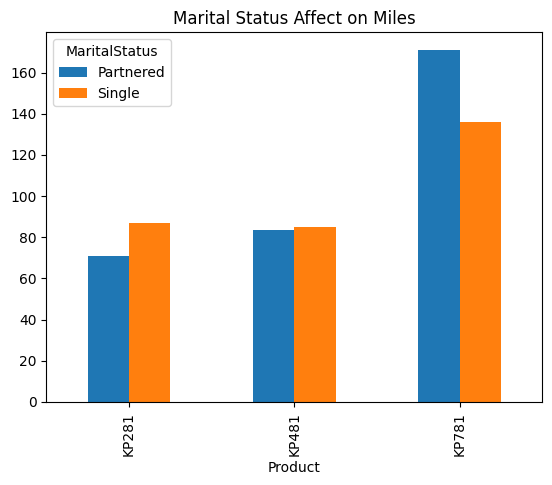

In [ ]:
combined_df.groupby(['Product','MaritalStatus'])['Miles'].mean().unstack().plot.bar()
plt.title('Marital Status Affect on Miles')
plt.show()

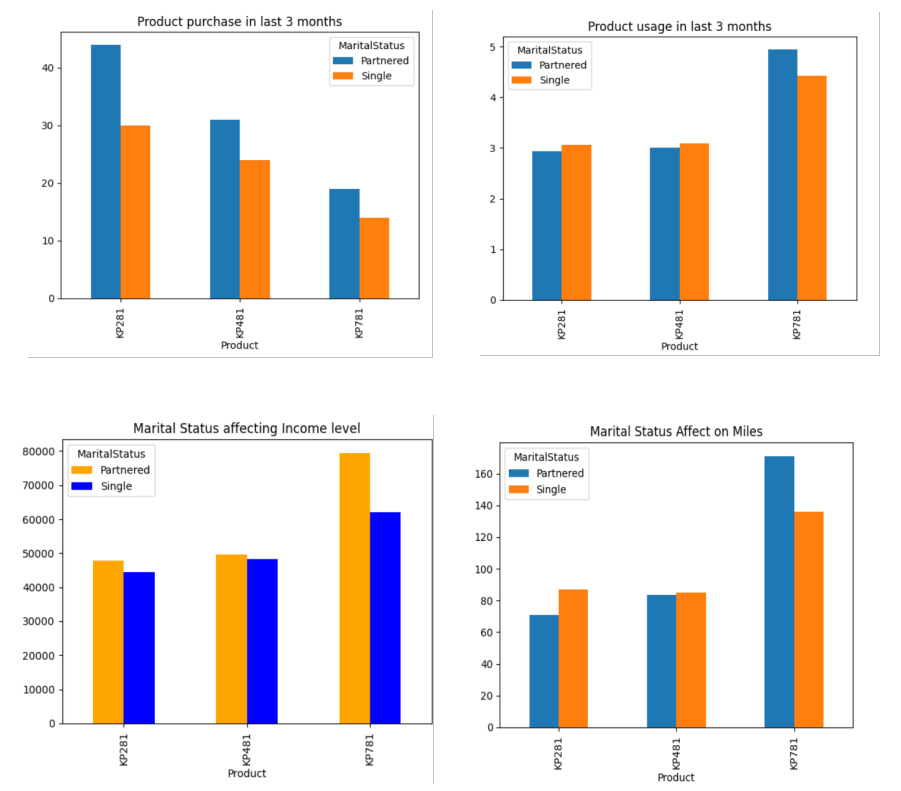

- Customers who have partner have more sales than single customer's.
- Marital Status doesn't affect the usage of product.
- MaritalStatus does affect the Income level with Customer's with Partnered status are earning more then Single customer's.
- Customer's with Partnered status does more miles on the treadmil.

# **Customer Contribution by Gender**

In [ ]:
pd.crosstab(combined_df['Product'],combined_df['Gender'],margins = True,normalize= True)

Gender,Female,Male,All
Product,,,
KP281,0.240741,0.216049,0.456790
KP481,0.172840,0.166667,0.339506
KP781,0.043210,0.160494,0.203704
All,0.456790,0.543210,1.000000


- Female customer's are more likely to buy the most expensive treadmill **KP781, with 43%, where Male customer's stand at mere 16%**.
- Although collectively **Male customer's contribute more than 50% of sales**.
- From total aerofit sale, **KP281 contribute about 45% to sale with KP481 at 33% & KP781 at 20%.**

In [ ]:
pd.crosstab(combined_df['Product'],combined_df['MaritalStatus'],margins = True,normalize= True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.271605,0.185185,0.456790
KP481,0.191358,0.148148,0.339506
KP781,0.117284,0.086420,0.203704
All,0.580247,0.419753,1.000000


- Another interesting info is that Partnered Customer's contribute **about 58% of sales collectively.**

# **Suggestions for Business**

**Sales**
 - focus on KP481 & KP781 product will lead to better sales, also avoiding the over reliance on base model.
 - KP781 particularly has less contribution to overall sale at about 20%. By creating educational content focused on their best product will lead to better engagement with customer's.
 - By also introducing more features and which directly benefit to customer like: Incline-Decline feature, Mobile connectivity etc. will make it more viable product.
 - Team should also check where they can save the cost on manufacturing material, for example- by using common chasis will lead to better cost efficiency.

**Customer Relationship**
 - Customer engagement is very crucial for word-of-mouth strategy, which will lead to organic growth.
 - introducing loyalty program will be a game changer for team. As the customer will get for example- Weekly exercises routine, exclusive offer for premium products.